# Library import

In [1]:
import openpyxl as op
import pandas as pd
import numpy as np
import win32com.client as win32

import matplotlib.pyplot as plt
parameters = {'axes.labelsize': 17,
              'xtick.labelsize': 16,
              'ytick.labelsize': 16,
          'axes.titlesize': 20}
plt.rcParams.update(parameters)
plt.rcParams['font.family'] = 'arial'

In [2]:
def SaveFile(filename):
    excel = win32.Dispatch("Excel.Application") 
    wb = excel.Workbooks.Open(r"C:\Users\PSID_PC22\Documents\GitHub\TeamEnv\TEA\{}".format(filename))
    excel.Visible = False
    wb.Save()
    excel.Quit()

# Plastric pyrolysis

![nn](../Figure/pyrolysis_process.png)

## TEA functions

In [3]:
def InputPyroValue(filename, target_data):
    
    # TEA file open
    wb = op.load_workbook(filename)
    capex_opex = wb['Plastic']
    
    # CAPEX
    cells = [f'F{jj}' for jj in range(5,9)] + [f'F{jj}' for jj in range(10,15)]
    blocks_input = ['HDPE[kg/hr]', 'LDPE[kg/hr]', 'PP[kg/hr]', 'PS[kg/hr]',
               'HEATER_HX_AREAC', 'RPLUGIN2', 'RPYROIN', 'COOLER_HX_AREAC', 'S1']     # RPLUGIN, RPYROOUT ==> 열교환면적 데이터로 수정
    
    for _blck, _cell in zip(blocks_input, cells):
        capex_opex[_cell] = target_data[_blck]
        
    # OPEX
    cells = [f'C{jj}' for jj in range(23,27)] + [f'C{jj}' for jj in range(28,32)]
    block_hd = ['HDPDCOM_HD', 'LPDECOM_HD', 'PPDECOM_HD', 'PSDECOM_HD',
              'HEATER_HD', 'RPLUG_HD', 'RPYRO_HD', 'COOLER_HX_DUTY']
    
    for _hd, _cell in zip(block_hd, cells):
        capex_opex[_cell] = target_data[_hd]
    
    wb.save(filename=filename)
    wb.close()   

def LoadPyroResults(filename):
    re_load = op.load_workbook(filename, data_only=True)
    tea_res = re_load['Plastic EAC&TPC']
    eac = tea_res['E34'].value
    tpc = tea_res['K25'].value
    return eac, tpc

## Load aspen data

In [9]:
data = pd.read_csv('Aspen_results/Results_pyrolysis_python_v2.csv')
data.columns

Index(['Country', 'HDPE[kg/hr]', 'LDPE[kg/hr]', 'PP[kg/hr]', 'PS[kg/hr]',
       'HEATER_T', 'HDPDCOM_HD', 'LPDECOM_HD', 'PPDECOM_HD', 'PSDECOM_HD',
       'HEATER_HX_AREAC', 'HEATER_HD', 'RPLUG_HD', 'RPYRO_HD',
       'COOLER_HX_AREAC', 'COOLER_HX_DUTY', 'HPDCOUT', 'LIQ', 'LPDCOUT',
       'PPDCOUT', 'PSDCOUT', 'RPLUGIN', 'RPLUGIN2', 'RPYROIN', 'RPYROOUT',
       'S1', 'VAP', 'H2O', 'H2', 'CO', 'CO2', 'CH4', 'C2H6', 'C2H4', 'C4H10',
       'C6H6', 'C7H8', 'C8H10', 'C9H18', 'C10H8', 'C10H14', 'C14H30', 'C16H34',
       'C22H46', 'C', 'O2', 'C6H6O', 'N2', 'CL2', 'S', 'NRP', 'ASH', 'HDPE',
       'PP', 'PS', 'LDPE'],
      dtype='object')

## Analyse economics

In [10]:
tea_file = 'TEA_plastic_pyro_v2.xlsx'

tea_res = []
for ii in range(len(data)):
    target_data = data.iloc[ii,:]
    InputPyroValue(tea_file, target_data)
    SaveFile(tea_file)
    EAC, TPC = LoadPyroResults(tea_file)
    tea_res.append([EAC, TPC])

## Save results

In [11]:
data[['EAC', 'TPC']] = tea_res
data.to_csv('Results_TEA_pyrolysis.csv')

## Results analysis

In [9]:
data_file = op.load_workbook('Aspen_results/Total_pyrolysis.xlsx', data_only=True)
data_sheet = data_file.active

df_raw = pd.DataFrame(data_sheet.values)
df_raw.iloc[2,1] = 'Country'

df = df_raw.iloc[3:,1:]
df.columns = df_raw.iloc[2,1:]
df.reset_index(inplace=True,drop=True)
df.columns

pyro_df= df.copy()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_51156\4119665739.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


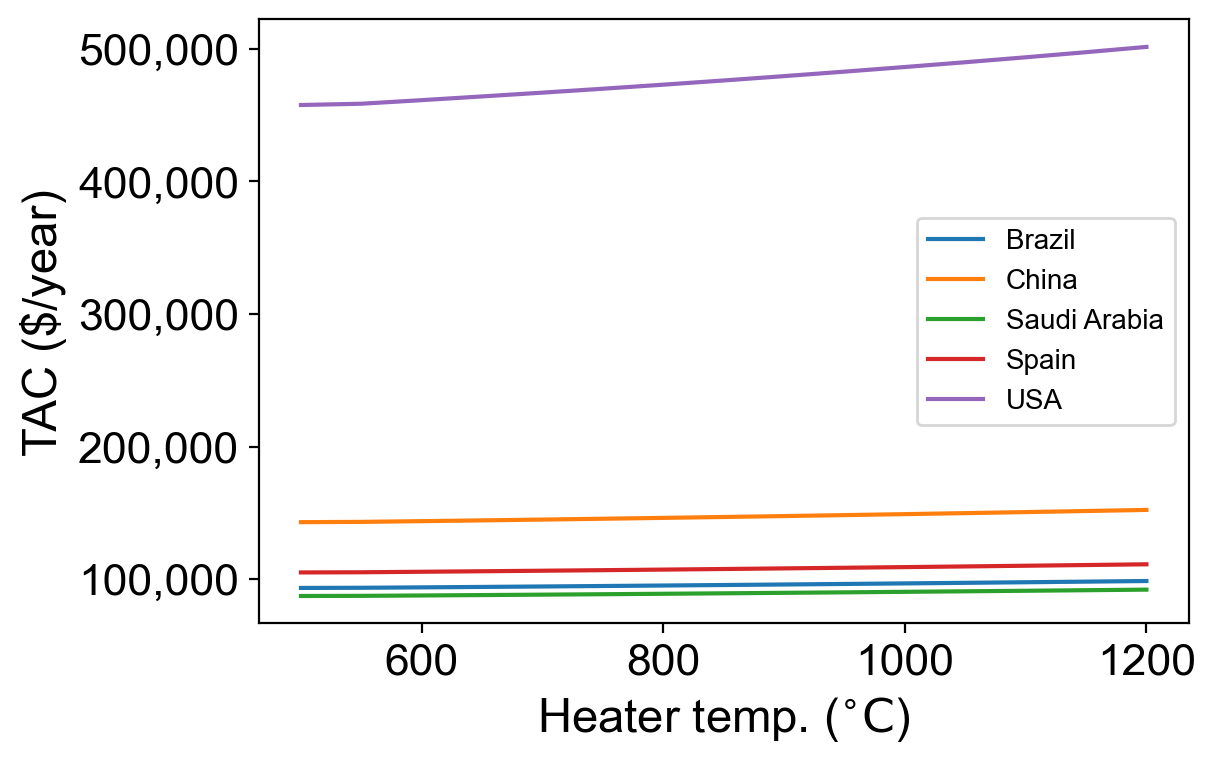

In [11]:
T_dom = np.linspace(500,1200,15)
plt.figure(dpi=200, figsize=(6,4))
for i in range(5):
    tmp = pyro_df.iloc[i*15:(i+1)*15]
    plt.plot(T_dom, tmp['TAC'], label=tmp.iloc[0,:]['Country'])
plt.legend()
plt.xlabel('Heater temp. ($^{\circ}\mathrm{C}$)')
plt.ylabel('TAC ($/year)')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

# SMR process

![nn](../Figure/SMR_process2.png)

## TEA functions

In [22]:
def InputSMRValue(filename, target_data):
    
    # TEA file open
    wb = op.load_workbook(filename)
    capex_opex = wb['SMR']
    
    # CAPEX
    tmp_cells = [f'F{jj}' for jj in range(5,21)]
    dump = ['F7','F12','F17','F18',]
    cells = [i for i in tmp_cells if i not in dump]
    
    blocks_input = ['COMP_BRAKE_POWER', 'HEAT1_HX_AREAC', 'SMR_BAL_MASI_TFL', 
                    'PUMP_BRAKE_POWER', 'HX1_HX_AREAC', 'HX2_HX_AREAC',
                    'WGS_BAL_MASI_TFL','COOL1_HX_AREAC','DRUM_BAL_MASI_TFL', 
                    'PSA_BAL_MOLI_TFL', 'HEAT2_HX_AREAC', 'VSA_BAL_MASI_TFL']
    
    for _blck, _cell in zip(blocks_input, cells):
        capex_opex[_cell] = target_data[_blck]
        
    # OPEX
    tmp_cells = [f'C{jj}' if jj == 30 or jj == 34 else f'D{jj}' for jj in range(30,45)]
    dump = ['D32','D34','D37','D38','D40','D42','D43',]
    cells = [i for i in tmp_cells if i not in dump]

    block_hd = ['COMP_BRAKE_POWER', 'HEAT1_HX_DUTY', 'SMR_QCALC',
                'PUMP_BRAKE_POWER','HX1_HX_DUTY','HX2_HX_DUTY',
                'COOL1_HX_DUTY', 'PSA_QCALC', 'HEAT2_HX_DUTY']
    
    for _hd, _cell in zip(block_hd, cells):
        capex_opex[_cell] = target_data[_hd]
    
    wb.save(filename=filename)
    wb.close()   

def LoadSMRResults(filename):
    re_load = op.load_workbook(filename, data_only=True)
    tea_res = re_load['SMR EAC&TPC']
    eac = tea_res['E34'].value
    tpc = tea_res['K25'].value
    return eac, tpc

## Load Aspen data

In [9]:
data = pd.read_csv('Aspen_results/Results_SMR_v3_hx.csv')
data.columns

Index(['Unnamed: 0', 'CH4 flowrate', 'PUMP_BRAKE_POWER', 'COMP_BRAKE_POWER',
       'HEAT1_HX_AREAC', 'HEAT1_HX_DUTY', 'HEAT2_HX_AREAC', 'HEAT2_HX_DUTY',
       'COOL1_HX_AREAC', 'COOL1_HX_DUTY', 'HX1_HX_AREAC', 'HX1_HX_DUTY',
       'HX2_HX_AREAC', 'HX2_HX_DUTY', 'DRUM_BAL_MASI_TFL', 'SMR_QCALC',
       'SMR_BAL_MASI_TFL', 'WGS_BAL_MASI_TFL', 'PSA_QCALC', 'PSA_BAL_MOLI_TFL',
       'VSA_QCALC', 'VSA_BAL_MASI_TFL', 'VSA_BAL_MOLI_TFL', 'CH4', 'CO2', 'H2',
       'H2O', 'S1', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17',
       'S18', 'S19', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S9-1',
       'S9-2', 'CH4.1', 'CO', 'CO2.1', 'H2.1', 'H2O.1'],
      dtype='object')

## Analyse economics

In [23]:
tea_file = 'TEA_SMR process.xlsx'

tea_res = []
for ii in range(len(data)):
    target_data = data.iloc[ii,:]
    InputSMRValue(tea_file, target_data)
    SaveFile(tea_file)
    EAC, TPC = LoadSMRResults(tea_file)
    tea_res.append([EAC, TPC])

## Save results

In [24]:
data[['EAC', 'TPC']] = tea_res
data.to_csv('Results_TEA_SMR.csv')

## Results analysis

In [19]:
data_file = op.load_workbook('Aspen_results/Total_SMR.xlsx', data_only=True)
data_sheet = data_file.active

df_raw = pd.DataFrame(data_sheet.values)
df_raw.iloc[2,1] = 'Country'

df = df_raw.iloc[3:,1:]
df.columns = df_raw.iloc[2,1:]
df.reset_index(inplace=True,drop=True)
df.columns

smr_df= df.copy()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_51156\3986272241.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


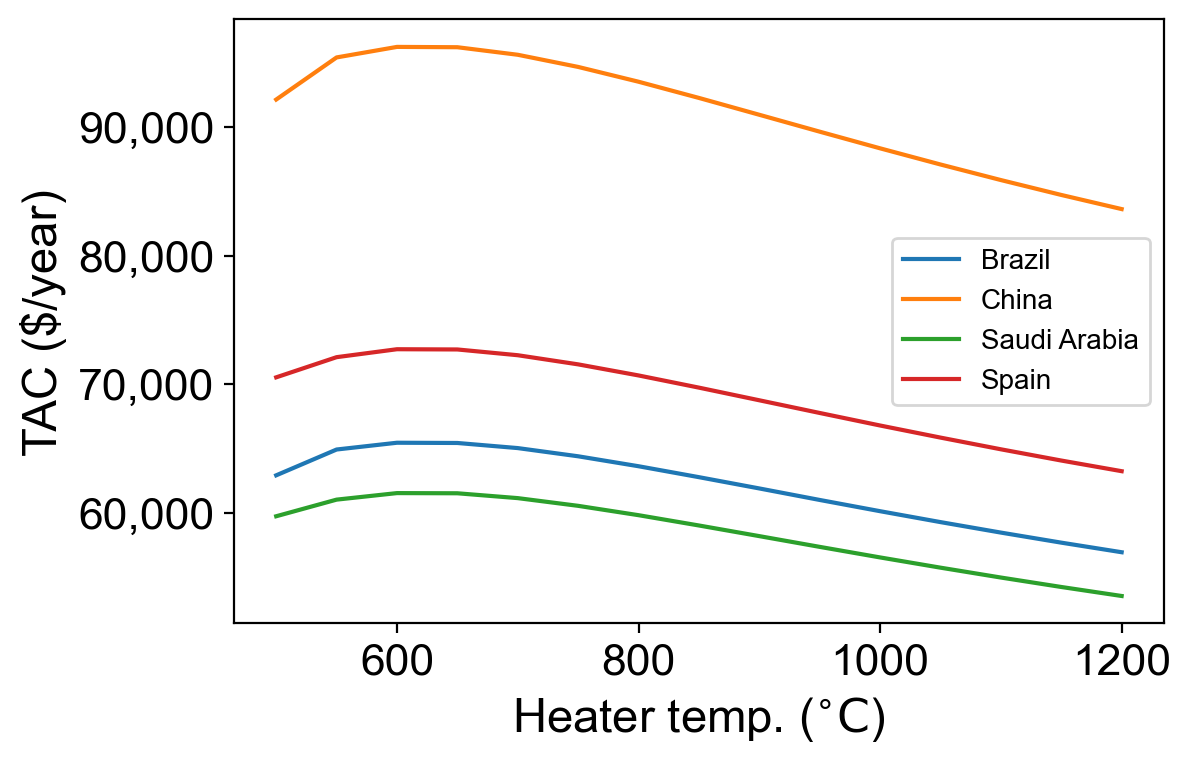

In [27]:
T_dom = np.linspace(500,1200,15)

plt.figure(dpi=200, figsize=(6,4))
for i in range(4):
    tmp = smr_df.iloc[i*15:(i+1)*15]
    plt.plot(T_dom, tmp['TAC'], label=tmp.iloc[0,:]['Country'])

plt.legend()
plt.xlabel('Heater temp. ($^{\circ}\mathrm{C}$)')
plt.ylabel('TAC ($/year)')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

# Pyrolysis + SMR

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_51156\216604686.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


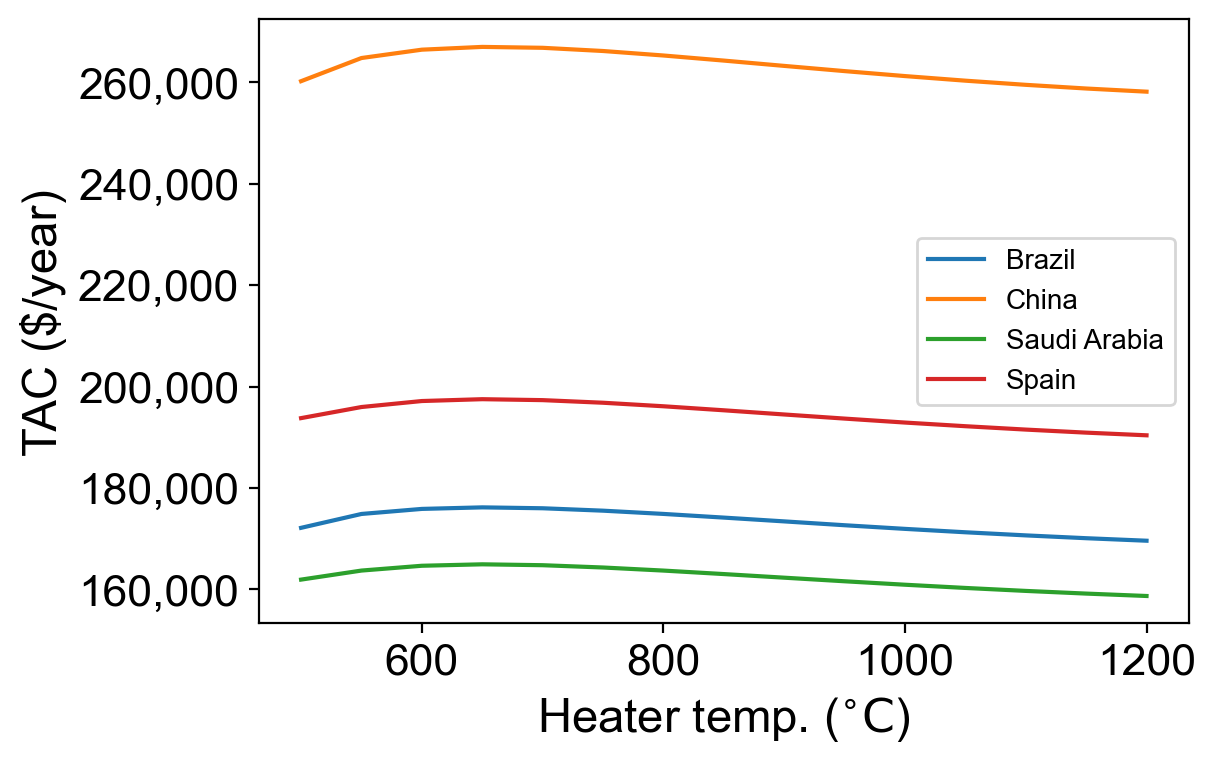

In [24]:
T_dom = np.linspace(500,1200,15)

plt.figure(dpi=200, figsize=(6,4))
for i in range(4):
    _tmp_p = pyro_df.iloc[i*15:(i+1)*15]
    _tmp_s = smr_df.iloc[i*15:(i+1)*15]
    
    plt.plot(T_dom, _tmp_p['TAC']+_tmp_s['TAC'], label=_tmp_p.iloc[0,:]['Country'])
plt.legend()
plt.xlabel('Heater temp. ($^{\circ}\mathrm{C}$)')
plt.ylabel('TAC ($/year)')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_51156\3760381163.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


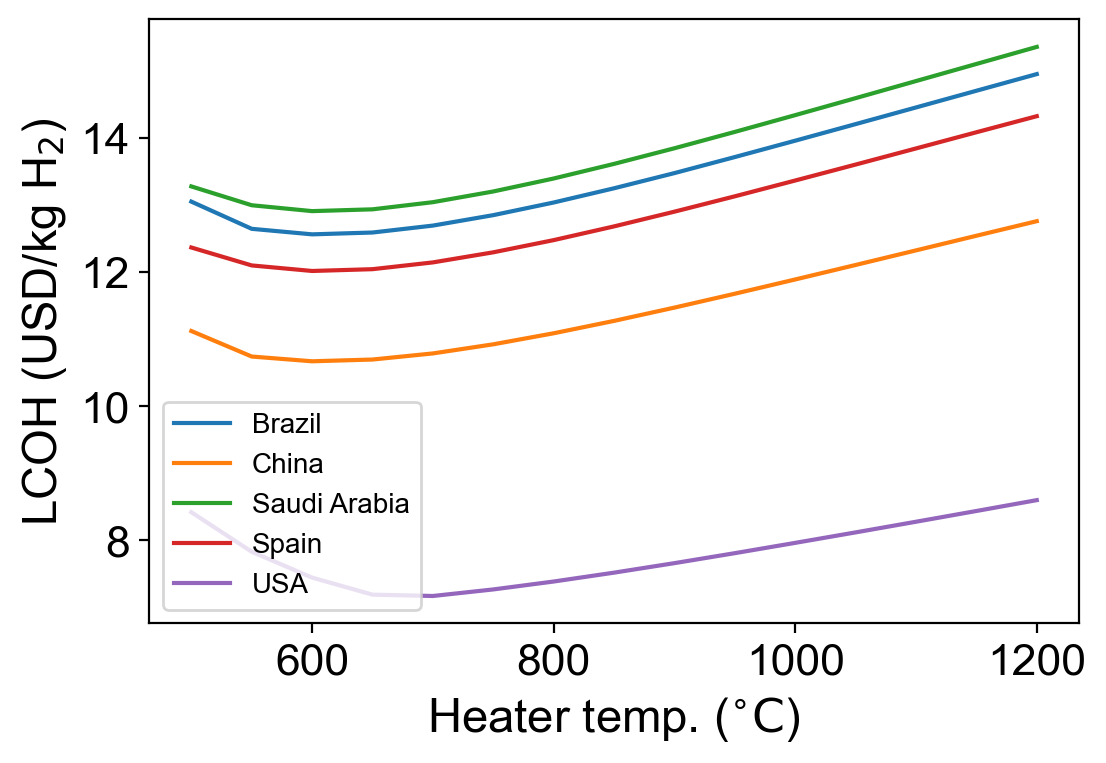

In [44]:
T_dom = np.linspace(500,1200,15)

plt.figure(dpi=200, figsize=(6,4))
for i in range(5):
    _tmp_p = pyro_df.iloc[i*15:(i+1)*15]
    _tmp_s = smr_df.iloc[i*15:(i+1)*15]
    
    plt.plot(T_dom, (_tmp_p['TAC']+_tmp_s['TAC'])/(_tmp_s.iloc[:,-31]*8500), label=_tmp_p.iloc[0,:]['Country'])
plt.legend()
plt.xlabel('Heater temp. ($^{\circ}\mathrm{C}$)')
plt.ylabel('LCOH (USD/kg H$_{2}$)')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()